# **Gradient Descent for Error Minimization in FinTech Models**

***--------------------------------------------------------------------------------------------------------------------------------------------------------------***

***Overview :***

Supervised Learning is a type of machine learning where the algorithm makes predictions/classifications on a dataset after learning from labelled data, that is, input along with its corresponding output labels. Through this the algorithm learns the relationship between the input and the output. So now, it can be used to make predictions/classifications for unseen data.

The algorithm does this through the use of a function f(x) to make predictions using the dataset. Here arises the general regression problem. The aim of the algorithm is to find the function f* such that f*(x) makes the best prediction of output y with respect to the dataset D.



$$
f^{*} = \arg \min_{f \in \mathcal{F}} E(f, D)
$$



Where F is the class of functions over which the error minimization is performed and E is the error/loss function.

Now, we express the function f as a function of parameters :


$$
f(x) = f(\phi(x), w)
$$



The goal is still to minimize the error function, but now, we need to find the optimal parameter w* for which the function is minimized :


$$
w^{*} = \arg \min_w \langle E(f(\phi(x), w), D) \rangle
$$



To do this, a possible option is to use iterative optimization algorithms. One such commonly used method is the Gradient Descent Algorithm. It computes the gradient of the error function E with respect to the parameters, and then updates the parameters in the opposite direction of the gradient to ultimately achieve the optimal point, the minima of the function. This document focuses on Gradient Descent as a common optimization algorithm to achieve the minimization.  
  
[Slide 20]

***--------------------------------------------------------------------------------------------------------------------------------------------------------------***

***Methodology***

So as described, each parameter’s gradient is calculated and the parameter is updated :

$$
w_j := w_j - \eta \cdot \frac{\partial E}{\partial w_j}
$$


This process is repeated until minima is obtained. The η is called the learning rate : which controls the step size, so, it is essential to set an appropriate η so as to not overshoot the minima and keep oscillating around the minima, or take too small steps and amplify the time taken to reach the minima.

For our example of a simple linear regression model,
MSE is used as the cost function


$$
E(w) = \sum_{i=1}^{N} (y_i - \hat{y}_i)^2
$$


Let the function f(x) = y be


$$
y = w_1x_1 + w_2x_2 + \cdots + w_nx_n + b
$$

After applying the general update rule


$$
w_j^{(t+1)} = w_j^{(t)} - \eta \, \frac{\partial E(w)}{\partial w_j}
$$

Alternatively, in vector form :


$$
\mathbf{w}^{(t+1)} = \mathbf{w}^{(t)} - \eta \, \nabla E(\mathbf{w}^{(t)})
$$

Where ∇E(w) is the gradient vector


$$
\nabla E(\mathbf{w}) = \left( \frac{\partial E}{\partial w_1}, \frac{\partial E}{\partial w_2}, \dots, \frac{\partial E}{\partial w_n} \right)
$$  
  
[Slide 23] [Personal Notes From Class]

***--------------------------------------------------------------------------------------------------------------------------------------------------------------***

***Multilingual Data Handling :***

In many applications, the input dataset D can be of many languages. So, to use it in the regression model, the data must be preprocessed beforehand to ensure consistency.

Some examples of preprocessing : Translating the date into one language, tokenization and embedding the textual features into numeric ones, normalization of the numeric data, dates, and categorical labels and standardization of units.

The key thing to note is that, once the data has been transformed into a unified numeric representation, the error function 𝐸 ( 𝑤 ) remains unchanged. The Gradient Descent optimization is carried out just as if it was done on a simple single language dataset.

Thus, due to preprocessing, the model can handle multilingual datasets without having to alter the usual regression methodology.

***--------------------------------------------------------------------------------------------------------------------------------------------------------------***

***FinTech Applications :***


Gradient descent models have a lot of applications in FinTech. By optimizing the parameters w* of a regression model, companies make data-driven decisions. Some examples are :


1.   Asset Price Prediction : Models forecast the values of stocks and bonds based on past patterns and the market's characteristics. The error in these forecasts is reduced by optimising parameters.

2.   Credit Risk Assessment : The likelihood of loan default or repayment behaviour can be estimated using regression models. Then, banks assign risk scores using this likelihood so as to make well-informed lending decisions. This is done due to accurate parameter estimation.

3. Fraud Detection And Transaction Analysis : Fraudulent tractions as well as deviations from the expected financial behaviour is identified by modelling them. To decrease the false positives and also increase the accuracy of detection, gradient descent is employed in fine-tuning the model's parameters.

***--------------------------------------------------------------------------------------------------------------------------------------------------------------***

***Implementation :***

In this collab, the gradient descent algorithm was implemented in Python. Codewise explanation is given beside the code and here, a high level overview is given :

1. Synthetic FinTech Data Generation  
  -> A simple, single-feature FinTech dataset that simulates how an asset_price depends on a single market signal is generated. Then n_samples observations are created and Gaussian noise is added to make the problem realistic. The data is also plotted for visualization

2. Preprocessing and Feature Matrix  
  -> Here, a design matrix X_fin is created. It includes a column of ones for the bias term. For improved gradient descent performance, standardizing the feature is also considered.

3. Gradient Descent Implementation (From Scratch)  
  -> Vectorized functions to compute predictions, MSE loss, gradients, and the gradient descent training loop have been implemented here.

4. Train the Linear Model with Gradient Descent  
  -> Weights are initialized and the gradient descent is started. The loss curve is tracked and learned parameters inspected (intercept & slope).

5. Visualizations: Loss Curve and Fitted Line  
  -> Loss vs iterations and the fitted regression line is plotted.

6. Export (x, f(x)) pairs to CSV  
  -> The Feature and label pairs are saved to fintech_dataset.csv in a two-column format: market_signal,asset_price.

***--------------------------------------------------------------------------------------------------------------------------------------------------------------***

***Evaluation Metrics and References :***

The loss function's value over training iterations as well as the final fit is shown at end using graphs.

- **_[Data Preprocessing for Regression Models](https://datacalculus.com/en/knowledge-hub/data-analytics/data-cleaning-and-preprocessing/data-preprocessing-for-regression-models)_**
- **_[How Gradient Descent Revolutionizes Financial Modeling and Decision Making](https://www.byteplus.com/en/topic/473510?title=how-gradient-descent-revolutionizes-financial-modeling-and-decision-making)_**
- **_[Application of Gradient Descent in Financial Services](https://neoshare.net/machine-learning/application-of-gradient-descent-in-financial-services/)_**

***--------------------------------------------------------------------------------------------------------------------------------------------------------------***

# Gradient Descent for Error Minimization — FinTech Example

**Course:** Introduction to Machine Learning (CS419)  
**Task:** Implement gradient descent from scratch to minimize Mean Squared Error (MSE) for a simple linear regression model.

**Notes:** This notebook uses a synthetic FinTech-style dataset (single-feature linear relation with noise).


## 1) Synthetic FinTech Data Generation

We generate a simple, single-feature FinTech dataset that simulates how an `asset_price` depends on a single market signal.We'll create `n_samples` observations and add Gaussian noise to make the problem realistic.


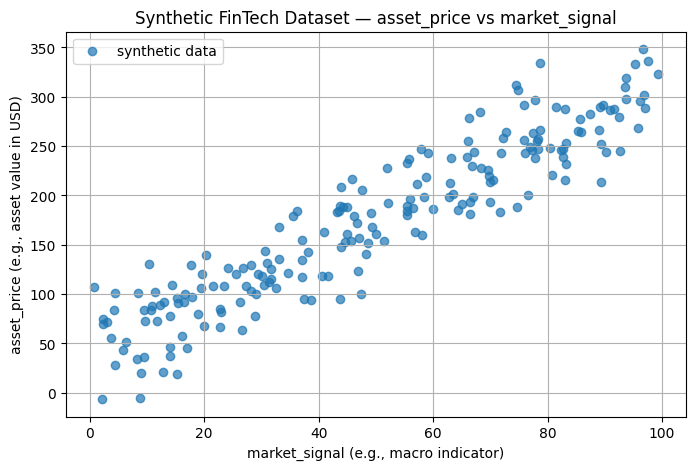

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import csv

rng = np.random.default_rng(42)

# These are the data paramters which could be modified by me as and when required.
n_samples = 200  # number of data points
market_signal_min, market_signal_max = 0.0, 100.0

true_intercept = 50.0 # baseline asset price
true_slope = 2.5 # sensitivity to the market signal

# Here, I am generating a sample market signal dataset to train my model on...
market_signal_data = rng.uniform(market_signal_min, market_signal_max, size=n_samples)

# I tried to incorporate noise in my target variable: asset_price_data (It would better model the realistic scenarios I feel)
noise_std = 30.0
asset_price_data = true_intercept + true_slope * market_signal_data + rng.normal(0.0, noise_std, size=n_samples)

# I plotted my dataset for reference(To be later used to train the model on)
plt.figure(figsize=(8,5))
plt.scatter(market_signal_data, asset_price_data, alpha=0.7, label='synthetic data')
plt.xlabel('market_signal (e.g., macro indicator)')
plt.ylabel('asset_price (e.g., asset value in USD)')
plt.title('Synthetic FinTech Dataset — asset_price vs market_signal')
plt.legend()
plt.grid(True)
plt.show()


## 2) Preprocessing and Feature Matrix

Here, I created a design matrix `X_fin` that includes a column of ones for the bias term. I also considered standardizing the feature for better gradient descent performance.

In [ ]:
# Feature scaling (standardization) — helps gradient descent converge faster
market_signal_mean = market_signal_data.mean()
market_signal_std = market_signal_data.std(ddof=0)

market_signal_scaled = (market_signal_data - market_signal_mean) / (market_signal_std + 1e-12)

# X_fin shape: (n_samples, 2)
X_fin = np.column_stack([np.ones(n_samples), market_signal_scaled])  # [bias, scaled_feature]

y_fin = asset_price_data.reshape(-1, 1)  # shape (n_samples, 1)

print('X_fin shape:', X_fin.shape)
print('y_fin shape:', y_fin.shape)


X_fin shape: (200, 2)
y_fin shape: (200, 1)


## 3) Gradient Descent Implementation (From Scratch)

I have implemented vectorized functions to compute predictions, MSE loss, gradients, and the gradient descent training loop.

In [ ]:
def predict_fin(X, model_weights_fin):
    return X.dot(model_weights_fin)

def mse_loss_fin(y_true, y_pred):
    errors = y_pred - y_true
    return np.mean((errors ** 2)) / 2.0  # division by 2 for cleaner gradient

def compute_gradient_fin(X, y_true, y_pred):
    #Compute gradient of MSE wrt weights (vectorized).
    n = X.shape[0]
    errors = y_pred - y_true  # shape (n,1)
    grad = (X.T.dot(errors)) / n  # shape (num_features, 1)
    return grad

def gradient_descent_fin(X, y, initial_weights, learning_rate_fin=0.05, num_iters=2000, verbose=False):

    #Returns optimized weights and history of loss values.
    w = initial_weights.copy().astype(float)  # shape (num_features, 1)
    loss_history = []
    for it in range(num_iters):
        y_pred = predict_fin(X, w)
        loss = mse_loss_fin(y, y_pred)
        loss_history.append(loss)

        grad = compute_gradient_fin(X, y, y_pred)
        # Update rule: w := w - lr * grad
        w -= learning_rate_fin * grad

        if verbose and (it % (num_iters // 10 + 1) == 0):
            print(f"Iter {it:4d} | loss = {loss:.4f}")
    return w, loss_history

## 4) Train the Linear Model with Gradient Descent

Here, I have initialized weights and ran gradient descent. I'll track the loss curve and inspect learned parameters (intercept & slope).

In [ ]:
initial_weights_fin = np.zeros((2,1))

learning_rate_fin = 0.1
num_iterations = 3000

# Here, I am training the model
model_weights_fin, loss_history_fin = gradient_descent_fin(
    X_fin, y_fin, initial_weights_fin, learning_rate_fin=learning_rate_fin, num_iters=num_iterations, verbose=True
)

print('\nLearned model weights (bias, slope):')
print(model_weights_fin.flatten())

# Here, I have Converted learned slope back to Original feature scale
learned_bias = model_weights_fin[0,0]
learned_slope_scaled = model_weights_fin[1,0]

learned_slope_original_scale = learned_slope_scaled / (market_signal_std + 1e-12)
# Here, i have adjusted intercept to match original x scale:
learned_intercept_original_scale = learned_bias - learned_slope_scaled * (market_signal_mean/(market_signal_std + 1e-12))

print(f"Learned intercept (original scale): {learned_intercept_original_scale:.4f}")
print(f"Learned slope (original scale): {learned_slope_original_scale:.4f}")
print(f"True intercept: {true_intercept}, True slope: {true_slope}")


Iter    0 | loss = 18464.8182
Iter  301 | loss = 448.1138
Iter  602 | loss = 448.1138
Iter  903 | loss = 448.1138
Iter 1204 | loss = 448.1138
Iter 1505 | loss = 448.1138
Iter 1806 | loss = 448.1138
Iter 2107 | loss = 448.1138
Iter 2408 | loss = 448.1138
Iter 2709 | loss = 448.1138

Learned model weights (bias, slope):
[173.95953017  75.97032638]
Learned intercept (original scale): 40.7252
Learned slope (original scale): 2.6978
True intercept: 50.0, True slope: 2.5


## 5) Visualizations: Loss Curve and Fitted Line

Plot loss vs iterations and the fitted regression line.

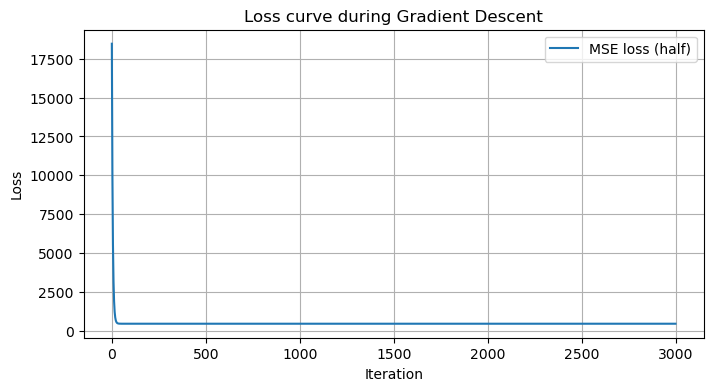

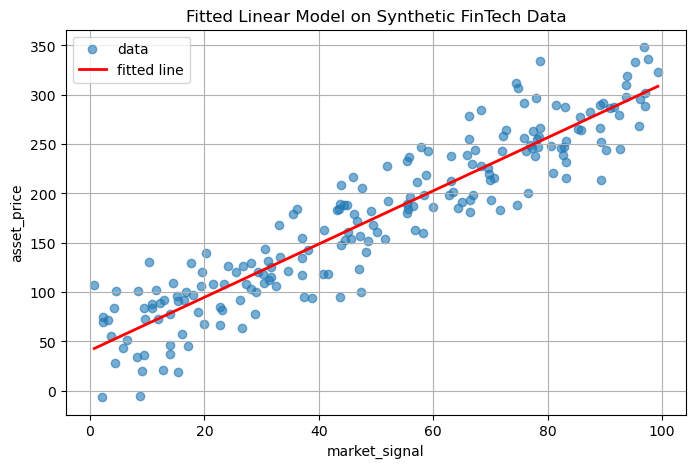

In [ ]:
# Loss curve
plt.figure(figsize=(8,4))
plt.plot(loss_history_fin, label='MSE loss (half)')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss curve during Gradient Descent')
plt.legend()
plt.grid(True)
plt.show()

# Compute predicted values on original market_signal_data scale
predictions_scaled = predict_fin(X_fin, model_weights_fin).flatten()

plt.figure(figsize=(8,5))
plt.scatter(market_signal_data, asset_price_data, alpha=0.6, label='data')
# Sort for plotting line
sorted_idx = np.argsort(market_signal_data)
plt.plot(market_signal_data[sorted_idx], predictions_scaled[sorted_idx], color='red', linewidth=2, label='fitted line')
plt.xlabel('market_signal')
plt.ylabel('asset_price')
plt.title('Fitted Linear Model on Synthetic FinTech Data')
plt.legend()
plt.grid(True)
plt.show()


## 6) Export (x, f(x)) pairs to CSV

In this section, I am Saving the Feature and label pairs to `fintech_dataset.csv` in two-column format: `market_signal,asset_price`.

In [ ]:
csv_filename = '/mnt/data/fintech_dataset.csv'
with open(csv_filename, mode='w', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(['market_signal', 'asset_price'])
    for x_val, y_val in zip(market_signal_data, asset_price_data):
        writer.writerow([x_val, y_val])

print(f"CSV written to: {csv_filename}")


## Notes

- `learning_rate_fin` and `num_iterations` can be tuned to speed up convergence or improve stability.